## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [44]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.optimizers import SGD, RMSprop, Adam

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

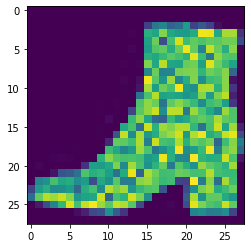

In [3]:
ind = np.random.randint(0, train_images.shape[0])
plt.imshow(train_images[ind])

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
# Нормировка
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [6]:
print(train_images.shape)
print(test_images.shape)  

(60000, 28, 28)
(10000, 28, 28)


In [7]:
# Вытягивание признаков
train_images = train_images.reshape((-1, train_images.shape[1] * train_images.shape[2]))
test_images = test_images.reshape((-1, test_images.shape[1] * test_images.shape[2]))

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [8]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
model1 = Sequential(name='model_1')
model1.add(Dense(128, activation='relu', input_shape=(784,)))

model1.add(Dense(10, activation='softmax'))

In [10]:
model1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [11]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Train the model.
hh = model1.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32, validation_split=0.2
)

# Evaluate the model.
model1.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Predict on the first 5 test images.
predictions = model1.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels[:5]) 

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6313 - accuracy: 0.7748 - val_loss: 0.4329 - val_accuracy: 0.8393
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3928 - accuracy: 0.8572 - val_loss: 0.3863 - val_accuracy: 0.8612
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3441 - accuracy: 0.8740 - val_loss: 0.3697 - val_accuracy: 0.8656
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3244 - accuracy: 0.8818 - val_loss: 0.3544 - val_accuracy: 0.8699
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3747 - accuracy: 0.8686
[9 2 1 1 0]
[9 2 1 1 6]


In [13]:
hh.history

{'loss': [0.5005682110786438,
  0.38277021050453186,
  0.34565868973731995,
  0.3210061192512512,
  0.3001337945461273],
 'accuracy': [0.8196458220481873,
  0.8612916469573975,
  0.8733124732971191,
  0.8812916874885559,
  0.8890208601951599],
 'val_loss': [0.4328974187374115,
  0.38633662462234497,
  0.36967983841896057,
  0.35443103313446045,
  0.34321126341819763],
 'val_accuracy': [0.8393333554267883,
  0.8611666560173035,
  0.8655833601951599,
  0.8699166774749756,
  0.877916693687439]}

In [14]:
model2 = Sequential(name='model_2')
model2.add(Dense(64, activation='relu', input_shape=(784,)))

model2.add(Dense(10, activation='softmax'))

In [15]:
model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [16]:
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Train the model.
hh2 = model2.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32, validation_split=0.2
)

# Evaluate the model.
model2.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Predict on the first 5 test images.
predictions = model2.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels[:5]) 

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6475 - accuracy: 0.7725 - val_loss: 0.4244 - val_accuracy: 0.8487
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4081 - accuracy: 0.8536 - val_loss: 0.3961 - val_accuracy: 0.8560
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3691 - accuracy: 0.8674 - val_loss: 0.3620 - val_accuracy: 0.8699
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3393 - accuracy: 0.8752 - val_loss: 0.3638 - val_accuracy: 0.8661
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3747 - accuracy: 0.8658
[9 2 1 1 6]
[9 2 1 1 6]


In [18]:
layers1 = [
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(64, activation='tanh'),
        Dense(10, activation='softmax'),
                      ]
layers2 = [
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(10, activation='softmax'),
                      ]
layers3 = [
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(10, activation='softmax'),
                      ]

In [19]:
model3 = Sequential(layers1)
model3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [20]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
model4 = Sequential(layers2)
model4.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [22]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


In [23]:
model5 = Sequential(layers3)
model5.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [24]:
model5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 64)               

In [25]:
def hhl(models):
    hh = models.fit(
      train_images,
      to_categorical(train_labels),
      epochs=25,
      batch_size=32, validation_split=0.2
    )

    # Evaluate the model.
    models.evaluate(
      test_images,
      to_categorical(test_labels)
    )

    # Predict on the first 5 test images.
    predictions = models.predict(test_images[:5])
    
    # Print our model's predictions.
    print(np.argmax(predictions, axis=1)) 

    # Check our predictions against the ground truths.
    print(test_labels[:5])
    
    return hh


In [26]:
hh_1 = hhl(model3)

Epoch 1/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6820 - accuracy: 0.7651 - val_loss: 0.4147 - val_accuracy: 0.8501
Epoch 2/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3935 - accuracy: 0.8570 - val_loss: 0.3743 - val_accuracy: 0.8639
Epoch 3/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3587 - accuracy: 0.8682 - val_loss: 0.3656 - val_accuracy: 0.8653
Epoch 4/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3282 - accuracy: 0.8779 - val_loss: 0.3464 - val_accuracy: 0.8725
Epoch 5/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3095 - accuracy: 0.8856 - val_loss: 0.3450 - val_accuracy: 0.8763
Epoch 6/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2967 - accuracy: 0.8907 - val_loss: 0.3502 - val_accuracy: 0.8768
Epoch 7/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2844 - accuracy: 0.8950 - val_loss: 0.3606 - val_accuracy:

In [27]:
hh_2 = hhl(model4)

Epoch 1/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6639 - accuracy: 0.7680 - val_loss: 0.4461 - val_accuracy: 0.8324
Epoch 2/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3986 - accuracy: 0.8544 - val_loss: 0.3666 - val_accuracy: 0.8677
Epoch 3/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3564 - accuracy: 0.8679 - val_loss: 0.3656 - val_accuracy: 0.8622
Epoch 4/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3282 - accuracy: 0.8788 - val_loss: 0.3514 - val_accuracy: 0.8740
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3080 - accuracy: 0.8874 - val_loss: 0.3436 - val_accuracy: 0.8742
Epoch 6/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2947 - accuracy: 0.8898 - val_loss: 0.3406 - val_accuracy: 0.8785
Epoch 7/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2822 - accuracy: 0.8949 - val_loss: 0.3424 - val_accuracy:

In [28]:
hh_3 = hhl(model5)

Epoch 1/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7316 - accuracy: 0.7390 - val_loss: 0.4701 - val_accuracy: 0.8251
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4442 - accuracy: 0.8403 - val_loss: 0.4227 - val_accuracy: 0.8419
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4016 - accuracy: 0.8557 - val_loss: 0.4202 - val_accuracy: 0.8466
Epoch 4/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3779 - accuracy: 0.8618 - val_loss: 0.4343 - val_accuracy: 0.8386
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3498 - accuracy: 0.8746 - val_loss: 0.4088 - val_accuracy: 0.8562
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3437 - accuracy: 0.8749 - val_loss: 0.4093 - val_accuracy: 0.8499
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3296 - accuracy: 0.8796 - val_loss: 0.3767 - val_accuracy:

Оптимизатор: SGD
Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 1.2594 - accuracy: 0.5726 - val_loss: 0.6871 - val_accuracy: 0.7435
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 0.5944 - accuracy: 0.7778 - val_loss: 0.5305 - val_accuracy: 0.8064
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4992 - accuracy: 0.8191 - val_loss: 0.4844 - val_accuracy: 0.8194
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.4551 - accuracy: 0.8353 - val_loss: 0.4591 - val_accuracy: 0.8309
Epoch 5/5
938/938 [==============================] - 1s 1ms/step - loss: 0.4068 - accuracy: 0.8527
Качество на тесте: 0.4067809283733368, 0.8526833057403564
Оптимизатор: RMSprop
Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.5703 - accuracy: 0.7916 - val_loss: 0.4035 - val_accuracy: 0.8515
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.4125 - accuracy: 0.8496 -

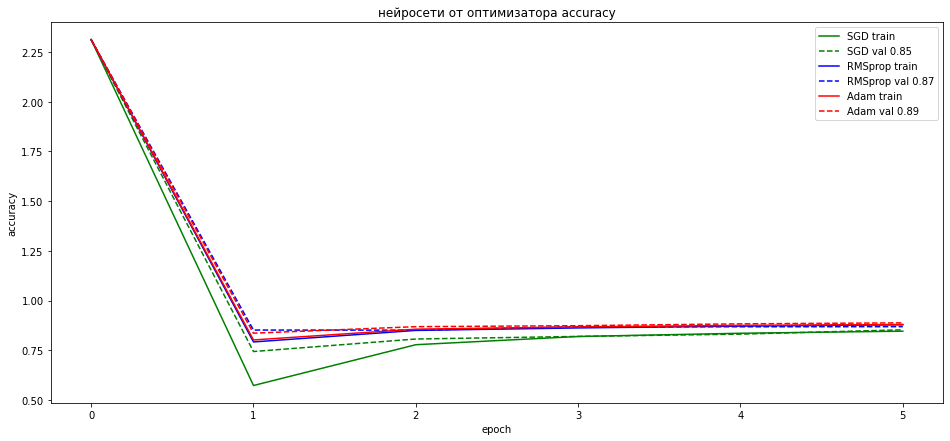

In [39]:
# создаем модель model
model = Sequential([
    Dense(64, activation='relu', input_shape=(28 * 28,)),
    Dense(45, activation='relu'),
    Dense(45, activation='relu'),
    Dense(45, activation='relu'),
    Dense(45, activation='relu'),
    Dense(10, activation='sigmoid'),
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model_weights.h5')

# будем сохранять модели в словарь
models = {}

plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r']

num_epochs = 5
batch_size = 64

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([SGD(),
                             RMSprop(),
                             Adam()]):
    print(f'Оптимизатор: {i_optim.get_config()["name"]}')
    
    # создаем рабочую модель  model_i, куда будем загружать эти веса (она должна быть идентичной структуры)
    model_i = Sequential([
        Dense(64, activation='relu', input_shape=(28 * 28,)),
        Dense(45, activation='relu'),
        Dense(45, activation='relu'),
        Dense(45, activation='relu'),
        Dense(45, activation='relu'),
        Dense(10, activation='sigmoid'),
    ])
    
    # загружаем веса model_i.load_weights('model.h5')
    model_i.load_weights('model_weights.h5')
    
    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    
    # вычисляем ошибку для modeli без обучения
    h0_train = model_i.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]), verbose=0)
    h0_val = model_i.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]), verbose=0)

    # проводим обучение модели 
    h = model_i.fit(train_images, to_categorical(train_labels),
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(train_images, to_categorical(train_labels)),
                    verbose=1)
    
    # вычисляем ошибку для modeli после обучения
    loss, metric = model_i.evaluate(train_images, to_categorical(train_labels), batch_size=64)
    print(f'Качество на тесте: {loss}, {metric}')
    
    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model_i

    
    # картинки
    '''
    plt.figure(figsize=(16, 7))
    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' val')
    '''
    
    plt.plot(epoch, ([h0_train[0]] + h.history['accuracy']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, ([h0_val[0]] + h.history['val_accuracy']),
             '--', c=colors[i],
             label=f'{model_i.optimizer.get_config()["name"]} val {metric:.2f}')

plt.legend()
plt.title('нейросети от оптимизатора accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Лучшее качество на тестовой выборке получилось 0.89 при 5 скрытых слоях и оптимизаторе Adam.

In [30]:
hh_t = {}
hh_a = []
hh_v = []
hh_list = [hh, hh2, hh_1, hh_2, hh_3]
for i in hh_list:
    hh_a.append(i.history['accuracy'][-1])
    hh_v.append(i.history['val_accuracy'][-1])
    
    
hh_t['accuracy'] = hh_a
hh_t['val_accuracy'] = hh_v

In [31]:
hh_d = {'layers':[], 'neurons': [], 'accuracy': [], 'val_accuracy': []}
l = [2, 2, 3, 5, 10]
n = [128, 64, 64, 64, 64]

In [32]:
for i in range(5):
    hh_d['layers'].append(l[i])
    hh_d['neurons'].append(n[i])
    hh_d['accuracy'].append(hh_list[i].history['accuracy'][-1])
    hh_d['val_accuracy'].append(hh_list[i].history['val_accuracy'][-1])

In [33]:
df = pd.DataFrame(hh_d)
df

,layers,neurons,accuracy,val_accuracy
0,2,128,0.923604,0.886000
1,2,64,0.882312,0.876083
2,3,64,0.936979,0.884000
3,5,64,0.933125,0.886500
4,10,64,0.912792,0.869167


Увеличение количества слоев увеличивает разрыв между accuracy и val_accuracy. Это похоже на переобучение сети. В то время как увеличение количества нейронов не приводит к переобучению.

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [41]:
y_pred = np.argmax(model1.predict(test_images), axis=1)
y_pred[:10]

array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7], dtype=int64)

In [42]:
CM = confusion_matrix(test_labels, y_pred)
print(CM)

[[892   0   8  25   4   1  63   1   6   0]
 [  5 966   1  24   2   0   2   0   0   0]
 [ 20   0 740  19 102   0 116   0   3   0]
 [ 36   7   7 891  31   2  24   0   1   1]
 [  2   1  85  44 797   0  71   0   0   0]
 [  0   0   0   0   0 933   0  38   0  29]
 [198   1  71  27  76   1 615   0  11   0]
 [  0   0   0   0   0  20   0 958   0  22]
 [ 14   0   1  11   2   9   7  11 944   1]
 [  0   0   0   0   0   5   1  44   0 950]]


**Матрица ошибок по классам**

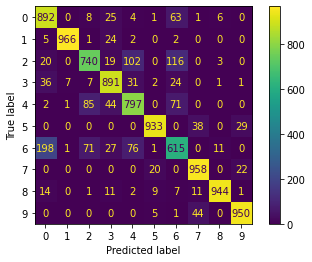

In [54]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=np.arange(10))

disp.plot(values_format = '.3g')

plt.show()